In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [4]:
# Load dataset (CSV format)
df = pd.read_csv("C://Users//91971//Desktop//ML_Lab//Practical_5//dataset//sms_spam_dataset.csv")

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Step 1: Convert labels to numeric (ham=0, spam=1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [7]:
df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [9]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42)

In [11]:
# Step 3: Convert text to numeric features (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
# Step 4: Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [13]:
# Step 5: Predictions
y_pred = model.predict(X_test_vec)

In [15]:
# Step 6: Evaluation
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [16]:
# Test on new SMS messages
new_messages = [
    "Congratulations! You have won a free lottery ticket worth $1000. Call now!",
    "Hey, are we still meeting for lunch today?",
    "Free entry in 2 a weekly comp to win FA Cup tickets"
]

# Convert to same format as training
new_messages_vec = vectorizer.transform(new_messages)

# Predictions
predictions = model.predict(new_messages_vec)

# Show results
for msg, label in zip(new_messages, predictions):
    print(f"Message: {msg} --> {'Spam' if label == 1 else 'Ham'}")

Message: Congratulations! You have won a free lottery ticket worth $1000. Call now! --> Spam
Message: Hey, are we still meeting for lunch today? --> Ham
Message: Free entry in 2 a weekly comp to win FA Cup tickets --> Spam


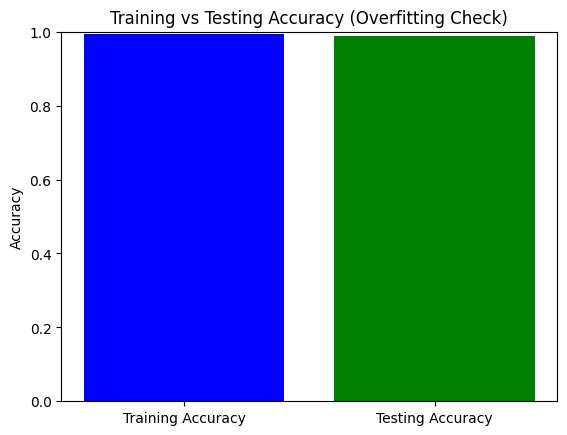

In [20]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Training accuracy
train_pred = model.predict(X_train_vec)
train_acc = accuracy_score(y_train, train_pred)

# Testing accuracy
test_acc = accuracy_score(y_test, y_pred)

# Plot
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_acc, test_acc], color=['blue','green'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy (Overfitting Check)")
plt.show()